# 회귀(Regression)

- 주어진 데이터로부터 연속적인 숫자 값을 예측하는 기법
- 즉, 입력변수(독립변수)를 이용해 출력변수(종속변수)의 값을 예측하거나 설명
- ex. 집의 크기와 가격 데이터 이용하여 특정 크기의 집 가격 예측


## 라쏘&릿지
- 회귀 분석에서 사용하는 두 가지 정규화 기법
- 정규화는 모델이 과적합되지 않도록 제약을 가하는 기법

### 라쏘
- 모델의 복잡성을 줄이기 위해 중요 계수가 아닌 일부 계수를 0으로 만듬
- 장점: 변수 선택이 자동으로 이루어져 해석 용이, 중요한 특징만 살려서 간단한 모델 만들 수 있음

### 릿지
- 모든 계수를 0에 가깝게 만들지만 0으로 만들지는 않음
- 계수값을 작게 만들어 모델 단순화
- 장점: 모든 변수를 사용하여 예측할 수 있어 변수 선택 필요 없는 경우 유용, 과적합 방지


## 선형 회귀
1. 선형회귀
- 단순 선형회귀와 다중 선형회귀가 있지만 흔히 사용하는 것은 <u>"다중 선형회귀"</u>입니다.
- Feature가 한 개인 경우가 드물기 때문에 보통 feature가 두 개 이상인 다중 선형회귀를 만들게 됩니다.

2. 비용함수
- 데이터와 모델 간의 거리를 계산합니다.
- 비용함수(cost function) 또는 손실함수, 목적함수라 부르기도 합니다.
- 오차(error)를 계산합니다. (실제 값과 예측값의 차이)
- 평균 제곱 오차를 최소화하는 파라미터를 찾습니다.

3. 경사하강법
- 오차를 찾아 나가는 방식
- 비용함수의 기울기 절대값이 가장 작은 지점을 찾아서 오차가 작은 모델을 만듭니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# 데이터 생성
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터

# make_dataset() 함수 정의
def make_dataset():
    
    # 당뇨병 데이터셋 로드
    dataset = load_diabetes()
    
    # 불러온 데이터셋 기반으로 df라는 데이터 프레임 만들기. 데이터셋의 피쳐네임을 컬럼으로 사용.
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    
    # df 데이터프레임에 target이라는 컬럼 추가 후, 실제 질병 진행 값 추가
    df['target'] = dataset.target
    
    # 데이터프레임을 학습&테스트 세트로 분리. 데이터프레임에서 target 컬럼 제거 후 목표 변수로 설정, 전체 데이터의 20%를 테스트 데이터로 할당.
    # train_test_split(특징데이터x, 목표데이터y, test_size, random_state, stratify)
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    
    # 학습&테스트 세트 반환
    return X_train, X_test, y_train, y_test


# make_dataset 함수를 호출하여 학습&테스트 세트를 가져오고, 이를 X_train, X_test, y_train, y_test 변수에 할당
X_train, X_test, y_train, y_test = make_dataset()

# 학습&테스트 세트의 모양 출력하여 데이터셋 크기 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [3]:
# 선형 회귀
# 사이킷런의 선형회귀 모델 불러오기
from sklearn.linear_model import LinearRegression

# 선형회귀모델을 model이라는 변수에 할당(객체 생성)
model = LinearRegression()

# 학습데이터셋을 활용해서 모델 학습 진행
model.fit(X_train, y_train)

# 학습된 모델을 사용해 테스트 데이터의 예측값 생성 -> pred에 할당
pred = model.predict(X_test)

# 테스트 데이터의 실제값(y_test)과 모델의 예측값(pred) 비교하여 예측 성능 평가 (MSE: 평균 제곱 오차 계산)
mean_squared_error(y_test, pred)

2707.6236708320466

# 릿지 회귀
- 오버피팅 문제로 규제(regularization)를 적용한 모델
- 규제 방식: L2 규제
- 파라미터(alpha) 값을 활용해 조절
- alpha 값이 커질수록 회귀 계수 값을 작게 만듦

In [4]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

# 결과가 위 회귀보다 커짐. 숫자가 작을 수록 좋은건데...

3522.1129142470336

In [5]:
# 회귀 계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,31.293287
sex,-71.449580
bmi,267.605153
bp,197.364745
s1,14.613106
s2,-13.884790
s3,-124.649955
s4,106.212968
s5,221.068052
s6,101.202651


In [6]:
# 릿지 회귀 (alpha=10)
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5521.882311176061

In [7]:
# 회귀 계수 (alpha 10)
coef['alpha10'] = model.coef_
coef

,alpha1,alpha10
age,31.293287,16.703159
sex,-71.449580,-1.796452
bmi,267.605153,61.026348
bp,197.364745,47.435152
s1,14.613106,18.491225
s2,-13.884790,13.440080
s3,-124.649955,-35.542084
s4,106.212968,38.896129
s5,221.068052,55.276214
s6,101.202651,35.868345


In [8]:
# 릿지 회귀 (alpha=0.05)
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2699.6575055293893

In [9]:
# 회귀 계수 (alpha 0.05)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha10,alpha0.05
age,31.293287,16.703159,-0.509655
sex,-71.449580,-1.796452,-223.350550
bmi,267.605153,61.026348,469.442823
bp,197.364745,47.435152,348.377551
s1,14.613106,18.491225,-146.949652
s2,-13.884790,13.440080,-18.302744
s3,-124.649955,-35.542084,-141.660642
s4,106.212968,38.896129,115.862762
s5,221.068052,55.276214,432.505816
s6,101.202651,35.868345,69.579039


# 라쏘 회귀
- 오버피팅 문제로 규제(regularization)를 적용한 모델
- 규제 방식: L1 규제 (중요한 피처만 선택하는 특성)
- L2에 비해 회귀 계수를 급격히 감소시켜 <U>중요하다고 생각하는 피처만 선택하고 나머지는 0으로</U> 만듦

## [리마인드] 규제 방식 비교
- 릿지 회귀 : L2 규제 방식
- 라쏘 회귀 : L1 규제 방식 (중요한 피처만 선택하는 특성)

In [10]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4179.146884323723

In [11]:
# 회귀 계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.588370
bp,46.375388
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.167660
s6,0.000000


In [12]:
# 라쏘 회귀 (alpha=2)
model = Lasso(alpha=2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179448666

In [13]:
# 회귀 계수 (alpha=2)
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.588370,42.963888
bp,46.375388,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.167660,0.000000
s6,0.000000,0.000000


In [14]:
# 라쏘 회귀 (alpha=0.05)
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4553190372917

In [15]:
# 회귀 계수 (alpha=0.05)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.953867
bmi,343.588370,42.963888,487.192794
bp,46.375388,0.000000,340.499590
s1,0.000000,0.000000,-95.578630
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.868586
s4,0.000000,0.000000,10.489156
s5,245.167660,0.000000,457.331482
s6,0.000000,0.000000,39.292945


# 엘라스틱넷 회귀

- 오버피팅 문제로 규제(regularization)를 적용한 모델
- 규제 방식: L2 규제와 L1 규제 (중요한 피처만 선택하는 특성) 결합
- 시간이 상대적으로 오래 걸림


### [리마인드] 규제방식 비교
- 릿지 회귀 : L2 규제 방식
- 라쏘 회귀 : L1 규제 방식 (중요한 피처만 선택하는 특성)
- 엘라스틱넷 회귀 : L2+L1 규제 결합 방식

In [16]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6539.270795233337

In [17]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.6)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2675.6005929972935

# 랜덤포레스트 & XGBoost
- 머신러닝에서 자주 사용되는 강력한 앙상블 기법


### 1. 랜덤포레스트
- 여러 개의 의사결정 트리로 구성
- 각 나무는 데이터의 일부 샘플을 사용하여 독립적으로 학습&예측
- 앙상블 방법 중 배깅(bagging) 방식
- 부트스트랩 샘플링 (데이터셋 중복 허용)
- 최종 예측은 모든 난무의 예측 결과를 종합하여 결정 (회귀: 평균 / 분류:다수결 투표)

### 2. XGBoost
- 트리 앙상블 중 성능이 좋은 알고리즘
- eXtreme Gradient Boosting을 줄여서 XGBoost라고 한다.
- 약한 학습기가 계속해서 업데이트를 하며 좋은 모델을 만들어 간다.
- 각 단계에서 이전 모델의 오류를 보정하며 더 나은 모델 만들어감

### 비교
- 랜덤 포레스트는 여러 나무를 병렬로 학습시켜 예측을 종합, xgboost는 여러 나무를 순차적으로 학습하여 이전 모델의 오류 보정

### [트리 생성 방식의 차이]
- RF는 각 트리를 독립적으로 병렬로 생성, 각 트리 내 노드 분할은 순차적으로 이루어지기 때문에 트리가 깊어질수록 병렬 처리의 이점 줄어들 수 있음
- XGB는 알고리즘 특성상 각 트리가 순차적으로 생성되지만, 각 트리의 노드 분할은 병렬로 처리 가능하여 특정 조건에서 더 빠르고 효율적임(+트리 생성 과정에서 불필요한 노드를 제거하는 '프루닝' 적용)
- 작은 데이터셋에는 RF가 더 빠를 수 있음
- 랜덤포레스트는 무작위성&앙상블 기법으로, xgboost는 정규화&세심한 모델 조정으로 과적합 방지

In [18]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3185.0381123595503

In [19]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


4028.2455020344587

# 하이퍼파라미터 튜닝
- 모델의 성능 향상을 위해 하이퍼파라미터 튜닝을 진행
- 사이킷런의 model_selection에서 제공하는 GridSearchCV와 RandomizedSearchCV를 이용하여 최적화 가능

### 1. GridSearchCV
- grid search를 통해 모든 경우의 수 탐색하여 최적의 하이퍼파라미터를 찾음 (시간 오래 걸림)


### 2. RandomizedSearchCV
- RandomizedSearchCV 는 GridSearchCV와 달리 랜덤으로 N개의 조합만 탐색함
- (시간 내 최적의 하이퍼파라미터 탐색)

In [20]:
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
# 하이퍼파라미터
# 시간이 오래 걸려 learning_rate와 subsample는 주석 처리함
params = {# 'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        # 'subsample':[0.9, 0.8, 0.7]
        }

In [22]:
# 데이터셋 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

In [23]:
# GridSearchCV
#  'max_depth':[3, 5, 7],  'n_estimators':[100, 200]만 적용 시 3분 내외
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [24]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [25]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample =0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3173.045180496539

In [26]:
#  Randomized Search
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [27]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'n_estimators': 100, 'max_depth': 3}

# 회귀 평가 지표

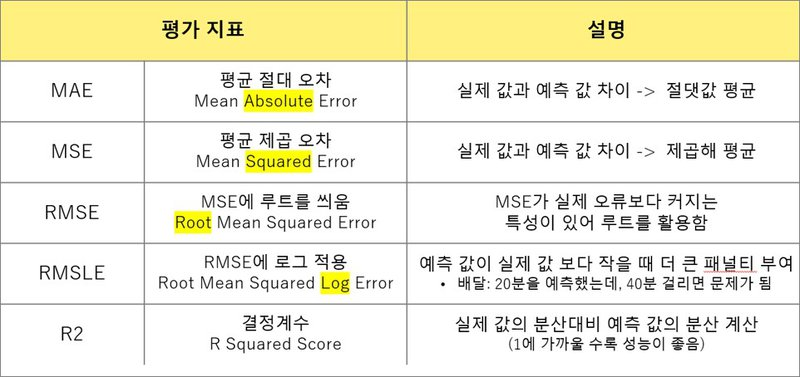

In [28]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

47.57186281011346

In [29]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

3173.045180496539

In [30]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

56.32978945901129

In [31]:
# RMSLE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

0.4359462312673838

In [32]:
# R2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5153820583895429

# 이번 시간 정리

1. 선형 회귀, 릿지, 라쏘, 엘라스틱넷
- 회귀 모델과 규제

2. 비용함수, 손실함수, 목적함수
- 오차(error)를 줄이기 위한 함수

3. 평가(회귀)
- MAE, MSE, RMSE, RMSLE, R2
